In [407]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import sklearn.linear_model # linear models
import sklearn.linear_model # linear models


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# file directory (importing)
file = "./birthweight_low.xlsx"


# reading the file into script
birthweight = pd.read_excel(io=file)


# outputting the first ten rows of the dataset
birthweight.head(n=190)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [408]:
# finding missing values 
birthweight.isnull().any()

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

In [409]:
birthweight.mode()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,42,12.0,2,12.0,39,12.0,9,9,13,4,1,0,0,0,0,0,0,3742


In [410]:
# Replace the missing  values by the mod

for col in birthweight:
    if birthweight[col].dtype == 'float64' and birthweight[col].isnull().sum() > 0:
        mode = birthweight[col].mode()
        birthweight[col].fillna(value = mode[0],
                           inplace = True)
    elif birthweight[col].dtype == 'int64' and birthweight[col].isnull().sum() > 0:
        mean = birthweight[col].mode()
        birthweight[col].fillna(value = mean,
                           inplace = True)
#printing Results        
print(birthweight.isnull().any())

mage      False
meduc     False
monpre    False
npvis     False
fage      False
feduc     False
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool


In [411]:
# checking the information
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   196 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   196 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   196 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [412]:
# changing the data type
convert_col = {'meduc': int,
               "feduc":int,
               "monpre": int,
                "drink": int,
               "fage"  : int,
               "npvis":int,
                'bwght': float,}
  
birthweight = birthweight.astype(convert_col)

In [413]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 196
Features:     18



In [414]:
# looping to print column names one by one
for column in birthweight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


In [415]:
# INFOrmation about each variable
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   196 non-null    int64  
 2   monpre  196 non-null    int64  
 3   npvis   196 non-null    int64  
 4   fage    196 non-null    int64  
 5   feduc   196 non-null    int64  
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    float64
dtypes: float64(1), int64(17)
memory usage: 27.7 KB


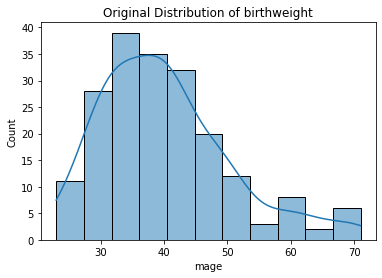

In [416]:
# Histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'mage',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of birthweight")
plt.xlabel(xlabel = "mage") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [417]:
#taking log of variables (checked one by one after taking log of each variable)
birthweight['log_monpre'] = np.log(birthweight['monpre'])
birthweight['log_male'] = np.log(birthweight['male']+0.01)
birthweight['log_fmaps'] = np.log(birthweight['fmaps'])
birthweight['log_feduc'] = np.log(birthweight['feduc'])
#birthweight['log_npvis'] = np.log(birthweight['npvis'])
#birthweight['log_omaps'] = np.log(birthweight['omaps'])
#birthweight['log_npvis'] = np.log(birthweight['npvis'])
#birthweight['log_bwght'] = np.log(birthweight['bwght'])


In [418]:

# INSTANTIATE a model object
lm_best = smf.ols(formula =  """bwght ~ mage+
                                        meduc+
                                        log_monpre+
                                        npvis+
                                        fage+
                                        log_feduc+
                                        log_fmaps+
                                        cigs+
                                        drink+
                                        male+
                                        mwhte+
                                        mblck+
                                        moth+
                                        fwhte+
                                        fblck+
                                        foth""",
                                data = birthweight)


#  FIT the data into the model object
results = lm_best.fit()


# analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     33.85
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           4.05e-43
Time:                        18:34:16   Log-Likelihood:                -1420.1
No. Observations:                 196   AIC:                             2870.
Df Residuals:                     181   BIC:                             2919.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1814.8693    479.181      3.787      0.0

<AxesSubplot:xlabel='fage', ylabel='Count'>

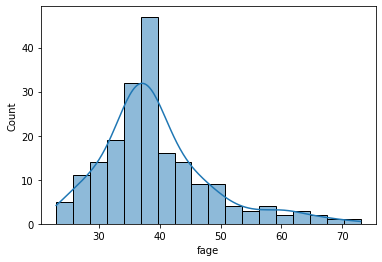

In [419]:
sns.histplot(data   = birthweight,
             x      = 'fage',
             kde    = True)



In [420]:
birthweight['log_bwght'] = np.log(birthweight['bwght'])

In [421]:
birthweight

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,log_monpre,log_male,log_fmaps,log_feduc,log_bwght
0,69,12,5,2,62,12,4,7,23,9,1,0,1,0,0,1,0,697.0,1.609438,0.00995,1.945910,2.484907,6.546785
1,68,12,3,10,61,11,4,6,25,11,1,1,0,0,1,0,0,1290.0,1.098612,0.00995,1.791759,2.397895,7.162397
2,71,12,3,6,46,12,2,7,21,12,1,0,1,0,0,1,0,1490.0,1.098612,0.00995,1.945910,2.484907,7.306531
3,59,16,1,8,48,16,7,8,21,10,0,0,0,1,0,0,1,1720.0,0.000000,-4.60517,2.079442,2.772589,7.450080
4,48,12,4,6,39,12,2,9,17,13,0,1,0,0,1,0,0,1956.0,1.386294,-4.60517,2.197225,2.484907,7.578657
5,67,11,4,8,40,8,4,9,16,14,0,1,0,0,1,0,0,1984.0,1.386294,-4.60517,2.197225,2.079442,7.592870
6,54,12,2,12,46,12,9,9,17,12,1,0,1,0,0,1,0,2050.0,0.693147,0.00995,2.197225,2.484907,7.625595
7,71,14,4,7,51,11,9,8,15,13,0,1,0,0,1,0,0,2068.0,1.386294,-4.60517,2.079442,2.397895,7.634337
8,56,12,1,9,53,14,8,9,14,9,1,1,0,0,1,0,0,2148.0,0.000000,0.00995,2.197225,2.639057,7.672292
9,58,12,2,12,61,16,9,9,13,6,0,0,1,0,0,1,0,2180.0,0.693147,-4.60517,2.197225,2.772589,7.687080


In [422]:
# assiginin data to explanatory variable
birthweight_Explanatory   = birthweight.drop(['bwght',
                               ],
                                axis = 1)


# Response variable data
birthweight_target = birthweight.loc[ : , 'bwght']
#log_birthweight_target = birthweight.loc[ : , 'log_bwght'] # ready for use later


# Training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_Explanatory,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (147, 22)
y-side: 147


Testing Data
------------
X-side: (49, 22)
y-side: 49



In [423]:
#x = birthweight[["mage","meduc","monpre","npvis","fage","feduc","omaps","fmaps","cigs","drink","male","mwhte","mblck","moth","fwhte","fblck","foth"]]



#y = birthweight["bwght"]

In [424]:
# declaring set of x-variables
x_variables = [["mage","meduc","log_monpre""npvis","fage","log_feduc",
                "log_fmaps","cigs","drink","male","mwhte","mblck",
                "moth","fwhte","fblck","foth"]]



# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

['mage', 'meduc', 'log_monprenpvis', 'fage', 'log_feduc', 'log_fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth'] +


In [425]:
# merging X_train and y_train 
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# build a model
lm_best = smf.ols(formula =  """bwght ~ mage +
                                meduc +
                                monpre +
                                npvis +
                                fage +
                                feduc +
                                cigs +
                                drink +
                                male +
                                mwhte +
                                mblck +
                                moth +
                                fwhte +
                                fblck +
                                foth""",
                                data = birthweight_train)


# fit the model based on the data
results = lm_best.fit()



#analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     28.45
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           3.54e-32
Time:                        18:34:22   Log-Likelihood:                -1066.9
No. Observations:                 147   AIC:                             2162.
Df Residuals:                     133   BIC:                             2204.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2573.6054    207.886     12.380      0.0

In [426]:
birthweight_train

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,log_monpre,log_male,log_fmaps,log_feduc,log_bwght,bwght
42,58,16,2,8,54,17,9,9,11,7,0,0,0,1,0,0,1,0.693147,-4.60517,2.197225,2.833213,7.951207,2839.0
9,58,12,2,12,61,16,9,9,13,6,0,0,1,0,0,1,0,0.693147,-4.60517,2.197225,2.772589,7.687080,2180.0
80,48,16,2,12,35,16,9,9,15,4,0,0,0,1,0,0,1,0.693147,-4.60517,2.197225,2.772589,8.083329,3240.0
82,38,12,4,9,29,12,8,9,7,6,0,0,1,0,0,1,0,1.386294,-4.60517,2.197225,2.484907,8.087948,3255.0
45,64,12,1,35,49,10,9,10,10,4,0,1,0,0,1,0,0,0.000000,-4.60517,2.302585,2.302585,7.969012,2890.0
165,35,13,5,5,31,13,8,10,7,2,0,1,0,0,1,0,0,1.609438,-4.60517,2.302585,2.564949,8.270013,3905.0
78,49,17,2,30,29,17,9,9,17,4,1,0,1,0,0,1,0,0.693147,0.00995,2.197225,2.833213,8.071843,3203.0
103,41,14,2,19,29,17,9,9,14,5,1,0,1,0,0,1,0,0.693147,0.00995,2.197225,2.833213,8.164795,3515.0
143,47,13,1,17,43,16,9,9,0,1,1,0,1,0,0,1,0,0.000000,0.00995,2.197225,2.772589,8.227376,3742.0
121,53,13,2,14,38,14,9,9,11,3,1,0,1,0,0,1,0,0.693147,0.00995,2.197225,2.639057,8.202482,3650.0


In [427]:
# Assigning data to x-variables(explanatory variable)
x_variables= ["mage","meduc","monpre","npvis","fage","feduc","cigs","drink","male","mwhte","mblck","moth","fwhte","fblck","foth"]



In [428]:

# Preparing a DataFrame based the the analysis above
ols_data   =  birthweight.loc[ : , x_variables]


# Target variable
birthweight_target = birthweight.loc[ : , 'bwght']


# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_Explanatory,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)



In [429]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7355
OLS Testing Score  : 0.5754
OLS Train-Test Gap : 0.1601


In [430]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4289.34)
('mage', -15.77)
('meduc', 26.18)
('monpre', 14.01)
('npvis', 4.48)
('fage', -3.66)
('feduc', 25.73)
('cigs', -38.56)
('drink', -103.7)
('male', 68.42)
('mwhte', 138.96)
('mblck', -46.62)
('moth', -92.34)
('fwhte', -81.8)
('fblck', 77.51)
('foth', 4.29)


In [431]:

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))




# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.9533
Lasso Testing Score  : 0.9495
Lasso Train-Test Gap : 0.0038


In [432]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -14767.94)
('mage', -0.0)
('meduc', 0.0)
('monpre', 0.0)
('npvis', -2.65)
('fage', -0.0)
('feduc', 0.0)
('omaps', -3.2)
('fmaps', -19.64)
('cigs', -4.61)
('drink', -26.89)
('male', 35.71)
('mwhte', -0.0)
('mblck', 0.0)
('moth', -23.65)
('fwhte', -0.0)
('fblck', 0.0)
('foth', -0.0)
('bwght', 0.0)
('log_monpre', 0.09)
('log_male', -70.06)
('log_fmaps', 14.45)
('log_feduc', 2305.23)


In [433]:
# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -14767.94)
('meduc', 0.0)
('npvis', -2.65)
('feduc', 0.0)
('omaps', -3.2)
('fmaps', -19.64)
('cigs', -4.61)
('drink', -26.89)
('male', 35.71)
('mblck', 0.0)
('moth', -23.65)
('fblck', 0.0)
('bwght', 0.0)
('log_monpre', 0.09)
('log_male', -70.06)
('log_fmaps', 14.45)
('log_feduc', 2305.23)


In [434]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.9557
Testing Score : 0.9481
ARD Train-Test Gap : 0.0076


In [435]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -15187.54)
('mage', -0.00046)
('meduc', 0.76157)
('monpre', 0.00197)
('npvis', -4.94199)
('fage', -0.0007)
('feduc', 4.73873)
('omaps', -6.57887)
('fmaps', -45.556)
('cigs', -3.96777)
('drink', -28.19467)
('male', 1.91691)
('mwhte', 8e-05)
('mblck', 0.00064)
('moth', -48.32942)
('fwhte', 5e-05)
('fblck', 0.00075)
('foth', -0.00143)
('bwght', 0.00187)
('log_monpre', 9.17057)
('log_male', -0.00783)
('log_fmaps', 0.00191)
('log_feduc', 2374.4898)


In [436]:
# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', -15187.54)
('mage', -0.00046)
('meduc', 0.76157)
('monpre', 0.00197)
('npvis', -4.94199)
('fage', -0.0007)
('feduc', 4.73873)
('omaps', -6.57887)
('fmaps', -45.556)
('cigs', -3.96777)
('drink', -28.19467)
('male', 1.91691)
('mwhte', 8e-05)
('mblck', 0.00064)
('moth', -48.32942)
('fwhte', 5e-05)
('fblck', 0.00075)
('foth', -0.00143)
('bwght', 0.00187)
('log_monpre', 9.17057)
('log_male', -0.00783)
('log_fmaps', 0.00191)
('log_feduc', 2374.4898)


In [437]:
print(f"""
Model Type :  Lasso :I found Lasso is the best model                     
                                      
Training Score : {lasso_train_score}     
Testing Score  : {lasso_test_score}      
Train-Test Gap : {lasso_test_gap}  
________________
Model Type :   ARD                  
                                      
Training Score : {ard_train_score}     
Testing Score  : {ard_test_score}      
Train-Test Gap : {ard_test_gap}
________________
Model Type :   OLS                  
                                      
Training Score : {lr_train_score}     
Testing Score  : {lr_test_score}      
Train-Test Gap : {lr_test_gap}
""")


Model Type :  Lasso :I found Lasso is the best model                     
                                      
Training Score : 0.9533     
Testing Score  : 0.9495      
Train-Test Gap : 0.0038  
________________
Model Type :   ARD                  
                                      
Training Score : 0.9557     
Testing Score  : 0.9481      
Train-Test Gap : 0.0076
________________
Model Type :   OLS                  
                                      
Training Score : 0.7355     
Testing Score  : 0.5754      
Train-Test Gap : 0.1601

